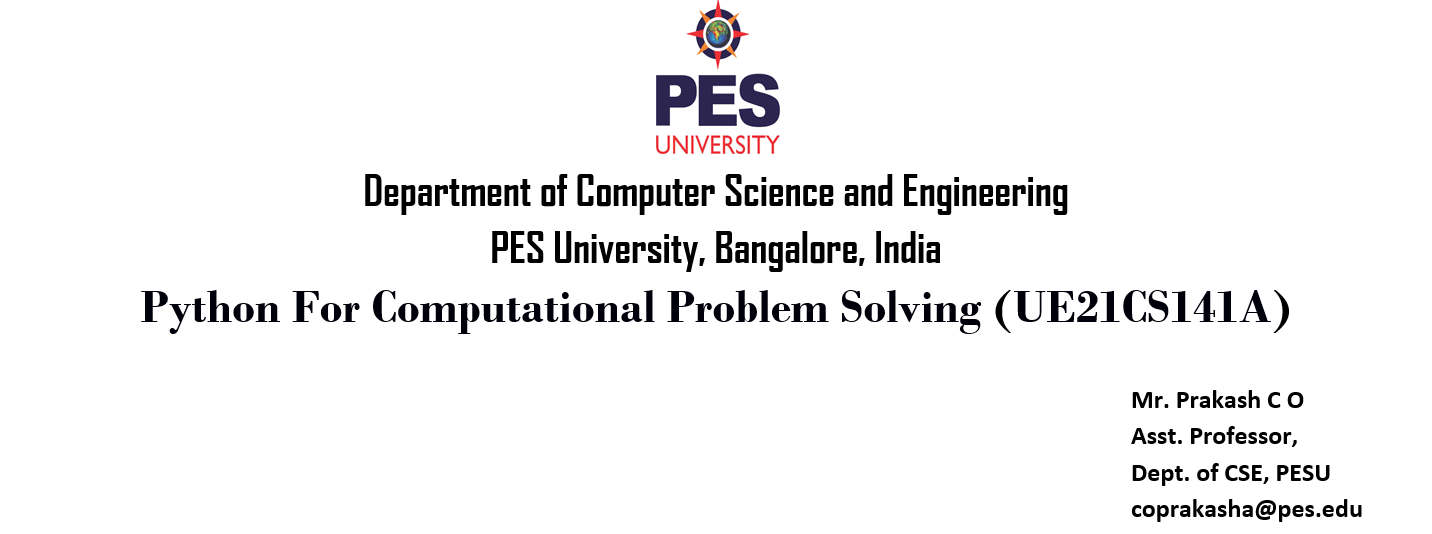

### Adding Behavior With Inner Functions: Decorators


##### First-Class Objects
In Python, functions are first-class objects. This means that functions can be passed around and used as arguments, just like any other object (string, int, float, list, and so on). Consider the following three functions:


In [1]:
def say_hello(name):
    return f"Hello {name}"

def be_awesome(name):
    return f"Yo {name}, together we are the awesomest!"

def greet_bob(greeter_func):
    return greeter_func("Bob")

In [3]:
print(greet_bob(say_hello))
print(greet_bob(be_awesome))

Hello Bob
Yo Bob, together we are the awesomest!


Note: 

* To create an f-string, prefix the string with the letter “ f ”. The string itself can be formatted in much the same way that you would with str.format(). 
* F-strings provide a concise and convenient way to embed python expressions inside string literals for formatting.

Here, say_hello() and be_awesome() are regular functions that expect a name given as a string. The greet_bob() function however, expects a function as its argument. We can, for instance, pass it the say_hello() or the be_awesome() function:

Note that greet_bob(say_hello) refers to two functions, but in different ways: greet_bob() and say_hello. The say_hello function is named without parentheses. This means that only a reference to the function is passed. The function is not executed. The greet_bob() function, on the other hand, is written with parentheses, so it will be called as usual.

#### What are decorators in Python?
Python has an interesting feature called decorators to add functionality to an existing code.

This is also called metaprogramming as a part of the program tries to modify another part of the program at compile time.

Basically, a decorator takes in a function, adds some functionality and returns it.

###### Decorators are very powerful and useful tool in Python since it allows programmers to modify the behavior of function or class. 

###### Decorators are higher-order functions that take a callable (function, method, class) as an argument and return another callable.

You can use decorator functions to add responsibilities to an existing callable dynamically and extend its behavior transparently without affecting or modifying the original callable.

To create a decorator, you just need to define a callable (a function, method, or class) that accepts a function object as an argument, processes it, and return another function object with added behavior.

##### Simple Decorators

Now that you’ve seen that functions are just like any other object in Python, you’re ready to move on and see the magical beast that is the Python decorator. Let’s start with an example:


In [1]:
def my_decorator(func):
    def wrapper():
        print("*********************")
        func()
        print("*********************")
    return wrapper

def say_hello():
    print("       Hello!")

say_hello()
say_hello = my_decorator(say_hello)
say_hello()

       Hello!
       Hello!


To understand what’s going on here, look back at the previous examples. We are literally just applying everything you have learned so far.
The so-called decoration happens at the following line:

say_hello = my_decorator(say_hello)

In effect, the name say_hello now points to the wrapper() inner function. Remember that you return wrapper as a function when you call my_decorator(say_hello):
print(say_hello)

<function my_decorator.<locals>.wrapper at 0x7f3c5dfd42f0>

However, wrapper() has a reference to the original say_hello() as func, and calls that function between the two calls to print().

Put simply: decorators wrap a function, modifying its behavior.

Before moving on, let’s have a look at a second example. Because wrapper() is a regular Python function, the way a decorator modifies a function can change dynamically. So as not to disturb your neighbors, the following example will only run the decorated code during the day:

In [5]:
from datetime import datetime

def not_during_the_night(func):
    def wrapper():
        if 7 <= datetime.now().hour < 22:
            func()
        else:
            pass  # Hush, the neighbors are asleep
    return wrapper

def say_hello():
    print("Hello!")

say_hello = not_during_the_night(say_hello)

If you try to call say_hello() after bedtime, nothing will happen:

In [7]:
say_hello()

Hello!


##### Syntactic Sugar!

Note: 

* In computer science, syntactic sugar is syntax within a programming language that is designed to make things easier to read or to express. 
* It makes the language "sweeter" for human use: things can be expressed more clearly, more concisely, or in an alternative style that some may prefer.

The way you decorated say_hello() above is a little clunky. First of all, you end up typing the name say_hello three times. In addition, the decoration gets a bit hidden away below the definition of the function.

Instead, Python allows you to use decorators in a simpler way with the @ symbol, sometimes called the “pie” syntax. The following example does the exact same thing as the first decorator example:


In [3]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()

Something is happening before the function is called.
Hello!
Something is happening after the function is called.


So, @my_decorator is just an easier way of saying 

say_hello = my_decorator(say_hello). 

It’s how you apply a decorator to a function.

In [9]:
say_hello()

Something is happening before the function is called.
Hello!
Something is happening after the function is called.


In [10]:
print(say_hello.__name__)

wrapper


In [4]:
def divide(x,y):  
    print(x/y)  

def outer_div(func):  
    def inner(x,y):  
        if(x<y):  
            x,y = y,x  
        return func(x,y)  
    return inner  

divide1 = outer_div(divide)  
divide1(2,4)  

2.0


In [5]:
# Extending the functionality of add_together with a decorator
def decorator_list(fnc):
    def inner(list_of_tuples):
        return [fnc(val[0], val[1]) for val in list_of_tuples]
    return inner

@decorator_list
def add_together(a, b):
    return a + b

print(add_together([(1, 3), (3, 17), (5, 5), (6, 7)]))

# add_together = decorator_list(add_together)

[4, 20, 10, 13]


#####  Decorators that can take arguments themselves
It may also be useful for decorators to take arguments themselves. In the slightly altered example presented here, we pass an integer argument to the decorator. This integer value is used as the exponent after the two values in the tuple have been added together. Here, the value 2, squares each value, so for the first tuple, 16 is returned (i.e. the square of 1 + 3).

To use arguments in decorators, we simply need to define a decorator itself. In the example below, 2 is the argument passed to the meta_decorator. This meta_decorator function returns the decorator_list function with 2 passed as the argument to power. This decorator_list decorator is then used in the ordinary way, i.e. it takes the add_together function and returns inner, which we can then call with our list of tuples.

Now we have a list of our tuples returned which have been added together and squared. To cube, or quadruple, we simply add either 3, or 4 to the argument of the meta_decorator.

In [6]:
def meta_decorator(power):
    def decorator_list(fnc):
        def inner(list_of_tuples):
            return [(fnc(val[0], val[1])) ** power for val in list_of_tuples]
        return inner
    return decorator_list


@meta_decorator(2)
def add_together(a, b):
    return a + b


print(add_together([(1, 3), (3, 17), (5, 5), (6, 7)]))

[16, 400, 100, 169]


References:
1.	https://realpython.com/primer-on-python-decorators/
2.	https://www.geeksforgeeks.org/ decorators-in-python/
3.	https://www.programiz.com/python-programming/decorator
4.	http://www.trytoprogram.com/python-programming/
5.  https://realpython.com/inner-functions-what-are-they-good-for/
